In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
change_map = '../../../results/RF/change_D/change_map_case_3.tif'
similarity_ = '../../../results/RF/simliarity_measure/model_1_ref_mask_similarity_measure.tif'

gt_source  = '../../../data/rasterized_samples/2018_rasterizedImage.tif'
gt_target = '../../../data/rasterized_samples/2019_rasterizedImage.tif'
# pred_source = '../../../results/RF/2018_rf_model_3_map.tif'
# pred_target = '../../../results/RF/2019_rf_model_3_map.tif'

# src = rasterio.open(r).read(1)
# src.shape

In [2]:
# gt_source = rasterio.open(gt_source_path).read(1)
# gt_target = rasterio.open(gt_target_path).read(1)

In [2]:
change_map_raster = rasterio.open(change_map).read(1)
similarity_map = rasterio.open(similarity_).read(1)
gt_source_raster = rasterio.open(gt_source).read(1)
gt_target_raster = rasterio.open(gt_target).read(1)
# pred_source_raster = rasterio.open(pred_source).read(1)
# pred_target_raster = rasterio.open(pred_target).read(1)

In [3]:
gt_mask_nodata = (gt_source_raster != 0) & (gt_target_raster != 0)
gt_binary = np.where(gt_mask_nodata, np.where(gt_source == gt_target, 1, 2), 0) 
gt_binary_mask = np.ma.masked_array(gt_binary, mask=True) # returns all true mask
gt_binary_mask.mask[gt_binary_mask.data != 0] = False # mask all non-zero mask
gt_binary_values = np.ma.compressed(gt_binary_mask)

In [4]:
np.unique(gt_binary_values)

array([2])

In [5]:
gt_binary_values[gt_binary_values == 1] = 0
gt_binary_values[gt_binary_values == 2] = 1

In [7]:
np.unique(gt_binary_values)

array([1])

In [11]:
mask_nonzero = np.ma.masked_array(change_map_raster, mask=True)
mask_nonzero.mask[mask_nonzero.data !=0] = False

In [19]:
change = np.ma.compressed(mask_nonzero)
similarity_non_nodata_value = np.ma.masked_array(similarity_map, mask=True)
similarity_non_nodata_value.mask[mask_nonzero.data !=0] = False
similarity = np.ma.compressed(similarity_non_nodata_value)

In [20]:
print(change.shape)
print(similarity.shape)

(4021720,)
(4021720,)


In [37]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(gt_binary_values, similarity)

/share/etud/e2008987/.conda/envs/python_env/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:780: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


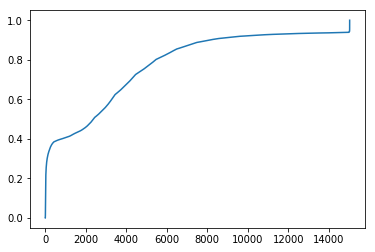

In [42]:
plt.plot(tpr)

<!-- Hello Charlotte,
I've fixed the binary change detection "error inspection" on pixel-based.
I'm currently working on the optimal threshold using the ROC curve; I have few things to clearify.

Based on the documentation of sklearn roc_curve, I will need to provide a y_true (binary) and y_score (non-thresholded measure of decisions). In my case, I understand the similarity measure(the output of the euclidean distance) will be the y_score. I was wondering what to use as the y_true.

What I tried out (I want to know whether I'm on the right track or I've missing, please.):
    I've used the binary change/no-change of between the two reference dataset as the y_true.
       I got an warning message: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless UndefinedMetricWarning).
<!--        And the fpr (False Positive rate) came with all nan. -->
       

Also, from this medium post, I noticed there are few method to get the optimal threshold (G-mean and  Precision-Recall curve and F1-score); which would one do you think I should go with? 

Note: I've already provide writen out maps of similarity measure only within the areas of available reference data on both years.

from sklearn.metrics import roc_curve
 -->